In [1]:

using Posets

┌ Info: Precompiling Posets [849245fe-9976-4417-8fcb-b00bf8cb81e3]
└ @ Base loading.jl:1278


In [2]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

# Inicializacion

In [19]:
data = readdlm("figs/poset0p95_univ_30.dat",Int);

In [20]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")];

In [21]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:30];

In [22]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes];

In [23]:
puntuaciones = hcat([(sort(d, by = first).Points) for d in data_filtrada]...)/100;

In [24]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:14]

14-element Array{Array{Int64,1},1}:
 [4, 11, 3, 28, 27, 6, 8, 30, 26, 2  …  18, 29, 17, 10, 16, 15, 9, 7, 5, 14]
 [4, 11, 28, 27, 6, 3, 8, 26, 2, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 5, 10, 16, 12, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 10, 5, 12, 16, 29, 7, 9, 15, 14]
 [4, 28, 11, 6, 27, 3, 8, 2, 26, 25  …  17, 10, 5, 12, 16, 7, 29, 14, 15, 9]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 16, 5, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 5, 16, 7, 29, 9, 15, 14]
 [4, 11, 28, 6, 27, 3, 8, 2, 26, 25  …  18, 17, 12, 5, 16, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 25, 26  …  12, 18, 16, 17, 5, 7, 29, 9, 15, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 26, 25  …  

In [ ]:
[sortperm(ranks_univs[x])[4] for x in 1:14]

## Histogramas, no me gustan

In [ ]:
[sortperm(ranks_univs[x])[6] for x in 1:14] |> histogram

In [ ]:
[sortperm(ranks_univs[x])[11] for x in 1:14] |> histogram

In [ ]:
[sortperm(ranks_univs[x])[27] for x in 1:14] |> histogram

In [ ]:
[sortperm(ranks_univs[x])[28] for x in 1:14] |> histogram

In [ ]:
[sortperm(ranks_univs[x])[3] for x in 1:14] |> histogram

# Grafica de posiciones

In [ ]:
function parejapromvar(listaranks,nodo)
    (posicionpromedio(listaranks, nodo)
        ,2*posicionvarianza(listaranks,nodo) )
        #,sqrt(posicionvarianza(listaranks,nodo)) )
end

In [ ]:
function findinter(pi,vi,pj,vj)
    as = pi - vi/2
    ae = pi + vi/2
    bs = pj - vj/2
    be = pj + vj/2
    
    #@show as,ae, bs,be
    
    if bs > ae || as > be
        return 0.0
    else
        os = max(as,bs)
        oe = min(ae,be)
        return oe-os
    end
end

![ejemplo](figs/poset0p95_univ_30.png)

primeros cinco

In [ ]:
using Statistics

In [ ]:
function correlacion(ranks,l1,l2)
    pos1 = [r[l1] for r in ranks]
    pos2 = [r[l2] for r in ranks]
    #@show pos1
    xx = mean(pos1.*pos2) - mean(pos1)*mean(pos2)
    x1 = sqrt(mean(pos1.*pos1) - mean(pos1)^2)
    x2 = sqrt(mean(pos2.*pos2) - mean(pos2)^2)
    xx/(x1*x2)
end

In [ ]:
correlacion(sortperm.(ranks_univs),6,6)

## Comparativa correlacion

In [ ]:
matconci = zeros(Float64,10,10)

In [ ]:
lista = [6,11,27,28, 3, 2,8,26, 25,30]#[6,11,27,28,3]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = correlacion(sortperm.(ranks_univs), i,j)
end

In [ ]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10)
    ,ytickfontsize=13,xtickfontsize=13)

## Comparativa traslape

In [ ]:
xs =1:10

In [ ]:
μs = [posicionpromedio(ranks_univs,x) for x in [6,11,27,28, 3, 2,8,26, 25,30]]

In [ ]:
σs = [sqrt(posicionvarianza(ranks_univs,x))/2 for x in [6,11,27,28,3, 2,8,26, 25,30]]

In [ ]:
σs2 = [sqrt(posicionvarianza(ranks_univs,x)) for x in [6,11,27,28,3, 2,8,26, 25,30]]

In [ ]:
fig=plot(xs, μs, grid=false, yerror=σs,line = (:dot,8)
,xticks=(xs, [6,11,27,28,3, 2,8,26, 25,30])
,xtickfontsize=13
    ,ytickfontsize=13
,ylabel = "pos.")

In [ ]:
fig=plot(xs, μs, grid=false, yerror=σs2,line = (:dot,8)
,xticks=(xs, [6,11,27,28,3, 2,8,26, 25,30])
,xtickfontsize=13
    ,ytickfontsize=13
,ylabel = "pos.")

In [ ]:
matconci = zeros(Float64,10,10)

In [ ]:
lista = [6,11,27,28, 3, 2,8,26, 25,30]#[6,11,27,28,3]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = findinter(parejapromvar(ranks_univs,i)...,parejapromvar(ranks_univs,j)...)
end

In [ ]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10)
,ytickfontsize=13,xtickfontsize=13)

## Comparativa. Menor es mejor

In [ ]:
;./script.wl figs/posetm3_univ_30.dat

![ejemplo](figs/poset0p95_univ_30.png)

In [ ]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[6] for x in 1:14]], labels = ["Cornell" "MIT"],legend=:topleft)

In [ ]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Cornell" "Swiss"],legend=:topleft)

In [ ]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14]], labels = ["Cornell" "Washington"],legend=:topleft)

In [ ]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Cornell" "Wisconsin-Madison"],legend=:topleft)

In [ ]:
scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Washington" "Wisconsin"],legend=:topleft)

In [ ]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Mit" "Swiss" "Washington" "Wisconsin"],legend=:topright)

In [ ]:
fig_e1 = scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Washington" "Swiss"],legend=:topleft)

En este caso, Washington vs Swiss, hay una relacion de superioridad Swiss < Washington.

In [ ]:
savefig(fig_e1, "/home/david/grafica1.png")

In [ ]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft)

In [ ]:
plot(ys, color = [:black :orange], line = (:dot, 4), )

In [ ]:
marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray))

In [ ]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft

,line = (:dot,4)
,marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray)))

In [ ]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,line = (:dot,8)
,marker = ([:hex :d], 12))

In [ ]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,linewidth=[4 4]
,linecolor = [:red :blue])

# Cortes $\alpha$: discusión distancia rankings a poset

1. Calculé unos cortes $\alpha$

In [25]:
corte98= puntuaciones |> fuzzy |> x -> αcut_poset(x, 0.98) |>matriz_rutas;

In [26]:
corte95= puntuaciones |> fuzzy |> x -> αcut_poset(x, 0.95) |> matriz_rutas;

In [27]:
corte90= puntuaciones |> fuzzy |> x -> αcut_poset(x, 0.90) |> matriz_rutas;

In [28]:
corte85= puntuaciones |> fuzzy |> x -> αcut_poset(x, 0.85) |> matriz_rutas;

In [29]:
corte80= puntuaciones |> fuzzy |> x -> αcut_poset(x, 0.80) |> matriz_rutas;

In [30]:
poset_m3 = puntuaciones |> m3 |> pareja_matrizadyacencia;

In [31]:
poset_m2 = puntuaciones |> m2 |> pareja_matrizadyacencia;

### Recordatorio energía local
Para recordar la definición de la **distancia local**,
consideramos un poset con la siguiente **matriz de adyacencia**:

$$
A = 
\begin{pmatrix}
 0 & 1 & 1 & 0\\
 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 1\\
 0 & 0 & 0 & 0
\end{pmatrix},
$$
y el ranking
$2 1 4 3$.
Como $21$ y $43$ están __invertidos__
en el poset, se tiene que la energía
local entre el poset y el ranking es $2$.


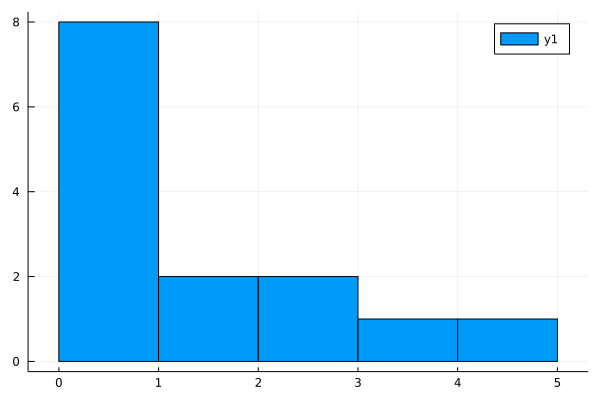

In [32]:
[energia_local(ranks, corte95) for ranks in ranks_univs] |> x -> histogram(x, bins=6)

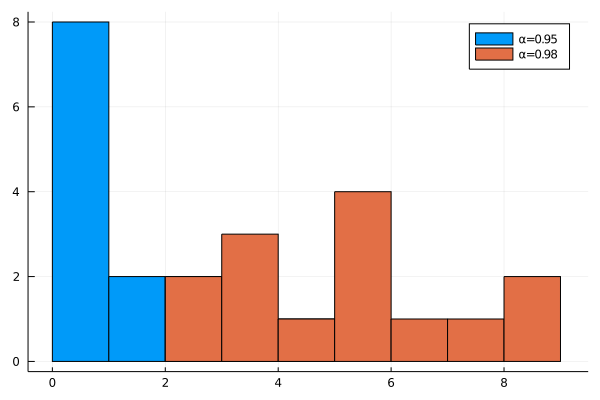

In [33]:
([
        [energia_local(ranks, corte95) for ranks in ranks_univs],
        [energia_local(ranks, corte98) for ranks in ranks_univs]
        ]) |> x -> histogram(x, bins=6, labels =["α=0.95" "α=0.98"])

In [34]:
[energia_local(ranks, corte85) for ranks in ranks_univs] |> countmap

Dict{Int64,Int64} with 1 entry:
  0 => 14

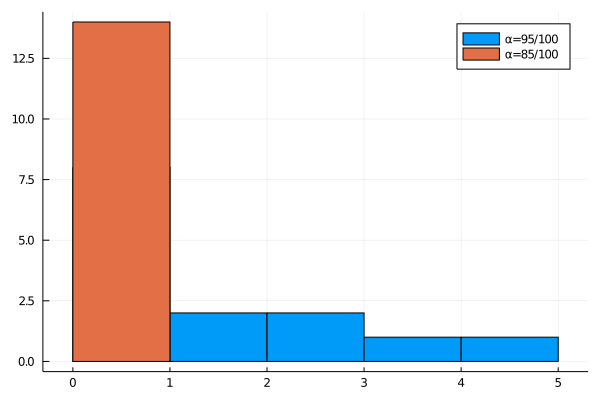

In [35]:
([
    [energia_local(ranks, corte95) for ranks in ranks_univs],
    [energia_local(ranks, corte85) for ranks in ranks_univs]
    ]) |> x -> histogram(x, bins=6, labels = ["α=95/100" "α=85/100"])

De esta forma, se puede observar que al aumentar
el valor de $\alpha$, se incrementa la dispersión
del histograma.

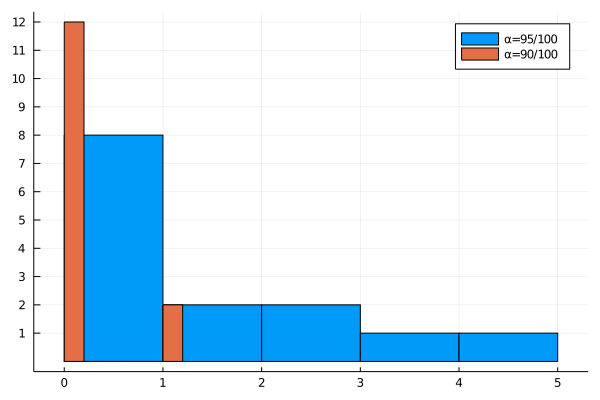

In [36]:
([
    [energia_local(ranks, corte95) for ranks in ranks_univs],
    [energia_local(ranks, corte90) for ranks in ranks_univs]
    ]) |> x -> histogram(x, bins=6, labels = ["α=95/100" "α=90/100"],yticks=(1:15, 1:15))

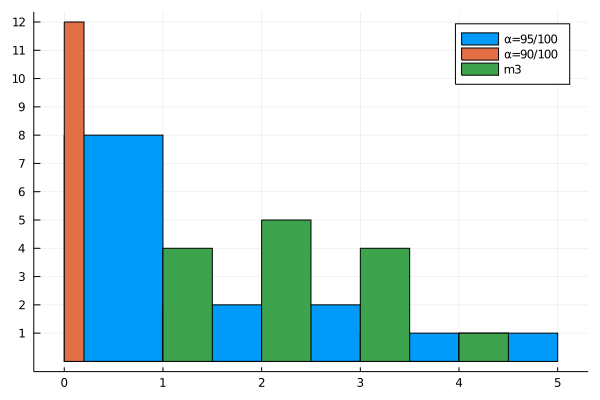

In [37]:
([
    [energia_local(ranks, corte95) for ranks in ranks_univs],
    [energia_local(ranks, corte90) for ranks in ranks_univs],
    [energia_local(ranks, poset_m3) for ranks in ranks_univs]
    ]) |> x -> histogram(x, bins=6, labels = ["α=95/100" "α=90/100" "m3"],yticks=(1:15, 1:15))

En esta grafica, se comparan los histogramas de los valores de energía. 
La energía se calcula entre un ranking y un poset, determinando el número de aristas incompatiles. Por defecto, se utiliza la *cerradura transitiva*.

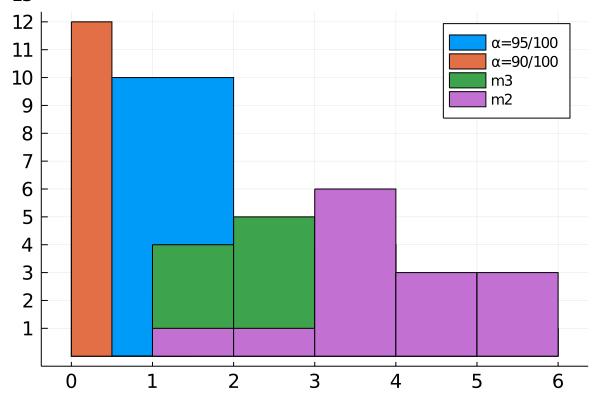

In [38]:
([
    [energia_local(ranks, corte95) for ranks in ranks_univs],
    [energia_local(ranks, corte90) for ranks in ranks_univs],
    [energia_local(ranks, poset_m3) for ranks in ranks_univs],
    [energia_local(ranks, poset_m2) for ranks in ranks_univs]
    ]) |> x -> histogram(x, #=bins=6,=# labels = ["α=95/100" "α=90/100" "m3" "m2"],yticks=(1:15, 1:15)
,xtickfontsize=13,ytickfontsize=13,legendfontsize=10)

In [ ]:
([
    [energia_local(ranks, corte95) for ranks in ranks_univs],
    [energia_local(ranks, corte90) for ranks in ranks_univs]
    ]) |> x -> histogram(x, #=bins=6,=# labels = ["α=95/100" "α=90/100"],yticks=(1:15, 1:15)
,xtickfontsize=13,ytickfontsize=13,legendfontsize=10)

In [ ]:
    [energia_local(ranks, corte95) for ranks in ranks_univs]

In [ ]:
corte90|>sum

In [ ]:
corte95|>sum

In [ ]:
corte90|> reduccion_transitiva|>sum

In [ ]:
corte95|> reduccion_transitiva|>sum

In [ ]:
    [energia_local(ranks, corte90|>reduccion_transitiva) for ranks in ranks_univs]

In [ ]:
    [energia_local(ranks, corte95|>reduccion_transitiva) for ranks in ranks_univs]

In [ ]:
αcut_poset([ 0 0.95 0.8; 0.2 0. 0.6; 0.9 0.7 0.], .8)

In [ ]:
αcut_poset([ 0 0.95 0.8; 0.2 0. 0.6; 0.9 0.7 0.], .7)

In [3]:
fakepunt = 
[.9 .9 .6 .9;
.6 .6 .9 .6;
.3 .3 .3 .3]

3×4 Array{Float64,2}:
 0.9  0.9  0.6  0.9
 0.6  0.6  0.9  0.6
 0.3  0.3  0.3  0.3

In [4]:
fakeposet = fakepunt |> fuzzy

3×3 Array{Float64,2}:
 1.0       0.888889  1.0
 0.727273  1.0       1.0
 0.363636  0.444444  1.0

In [5]:
using Combinatorics

In [18]:
[energia_local( r, αcut_poset(fakeposet, .4)) for r in collect(permutations(1:3))]

6-element Array{Int64,1}:
 0
 0
 0
 1
 1
 0

In [7]:
[energia_local( r, αcut_poset(fakeposet, .9)) for r in collect(permutations(1:3))]

6-element Array{Int64,1}:
 0
 1
 0
 1
 1
 1

In [10]:
fakeposet

3×3 Array{Float64,2}:
 1.0       0.888889  1.0
 0.727273  1.0       1.0
 0.363636  0.444444  1.0

In [9]:
αcut_poset(fakeposet, .9)

3×3 Array{Int64,2}:
 0  0  1
 0  0  1
 0  0  0

In [17]:
αcut_poset(fakeposet, .4)

3×3 Array{Int64,2}:
 0  0  1
 0  0  0
 0  0  0

In [ ]:
collect(permutations(1:3))

In [ ]:
energia_local( [1,2,3], αcut_poset(fakeposet, .7))

In [ ]:
energia_local( [1,2,3], αcut_poset(fakeposet, .9))

In [ ]:
αcut_poset(fakeposet, .9)

### Conclusión
Los datos muestran que al usar valores altos de $\alpha$ se tiende a tener valores mayores de energía local, i.e., un mayor número de incompatibilidades entre el poset y los rankings.

In [ ]:
[energia_no_local(ranks, corte95) for ranks in ranks_univs] |> countmap

In [ ]:
[energia_local(ranks, corte98) for ranks in ranks_univs] |> countmap

In [ ]:
[energia_no_local(ranks, corte98) for ranks in ranks_univs] |> countmap

Usando el poset interseccion

In [ ]:
interseccion = matriz_interseccion_rankings(ranks_univs)

In [ ]:
[energia_local(ranks, interseccion) for ranks in ranks_univs] |> countmap

De aqui se puede concluir que al tomar valores de $\alpha$ cada vez mayores, se obtiene un valor de la energia local mas parecido al poset interseccion.